<a href="https://colab.research.google.com/github/Nithin-nani-04/ALN/blob/main/L1_L2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score





In [12]:
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [16]:
models = {
    "No Regularization": MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=42),
    "L1 Regularization": MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=1000, alpha=0.01, random_state=42),
    "L2 Regularization High Alpha": MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=1000, alpha=1.0, random_state=42),
}

No Regularization Train Accuracy: 1.0
No Regularization Test Accuracy: 0.83
L1 Regularization Train Accuracy: 1.0
L1 Regularization Test Accuracy: 0.845
L2 Regularization High Alpha Train Accuracy: 0.99625
L2 Regularization High Alpha Test Accuracy: 0.825


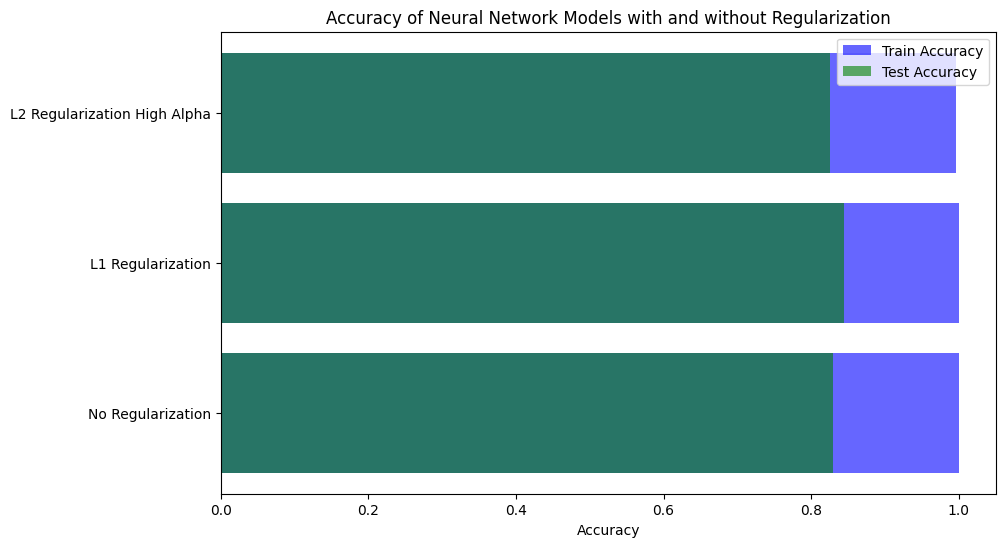

In [17]:
train_accuracy = {}
test_accuracy = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    train_accuracy[name] = accuracy_score(y_train, model.predict(X_train_scaled))
    test_accuracy[name] = accuracy_score(y_test, model.predict(X_test_scaled))
    print(f"{name} Train Accuracy: {train_accuracy[name]}")
    print(f"{name} Test Accuracy: {test_accuracy[name]}")

plt.figure(figsize=(10, 6))
plt.barh(range(len(train_accuracy)), list(train_accuracy.values()), align='center', color='blue', alpha=0.6, label='Train Accuracy')
plt.barh(range(len(test_accuracy)), list(test_accuracy.values()), align='center', color='green', alpha=0.6, label='Test Accuracy')
plt.yticks(range(len(train_accuracy)), list(train_accuracy.keys()))
plt.xlabel('Accuracy')
plt.title('Accuracy of Neural Network Models with and without Regularization')
plt.legend()
plt.show()
